In [2]:
import numpy as np 
import bagpipes as pipes
from astropy.io import fits
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

In [3]:
valid_band = {'HST':['F606W', 'F814W', 'F125W', 'F160W'],'JWST':['F115W', 'F150W', 'F277W', 'F444W'], 'SUBARU':['HSC-G','HSC-I','HSC-R','HSC-Y','HSC-Z','IB0945','NB0387','NB0527','NB0718','NB0816','NB0921','NB0973'],
             'CFHT':['H','i','Ks','u'], 'SPITZER':['ch1','ch2','ch3','ch4'], 'GEMINI':['Ks'], 'UKIRT':['J'], 'VISTA':['H','J','Ks','Y','NB118']}

In [4]:
def load_photometry_data(ID):
    #fluxes = pd.read_csv(f'E:/THU/OII_emitter/photometry/flux_sum_{ID}.csv', index_col=0).stack().values
    fluxes = pd.read_csv(f'../data/flux_sum_{ID}.csv', index_col=0).drop(['CFHT','SPITZER','GEMINI','UKIRT','VISTA'], axis=1).stack().values
    errors = pd.read_csv(f'../data/error_sum_{ID}.csv', index_col=0).drop(['CFHT','SPITZER','GEMINI','UKIRT','VISTA'], axis=1).stack().values
    photometry = np.c_[fluxes, errors]
    
    return photometry

In [5]:
load_photometry_data('v1')

array([[7.05192948e-01, 1.69812493e-02],
       [2.34595096e+00, 2.21551479e-02],
       [7.24101911e+00, 2.81868620e-02],
       [1.09615921e+01, 2.60711520e-02],
       [5.67454909e+00, 7.06977591e-02],
       [1.03288347e+01, 5.50987606e-02],
       [3.72887722e+01, 2.48640773e-02],
       [4.43720476e+01, 2.75013244e-02],
       [3.26749087e-01, 5.31395472e-03],
       [1.88407818e+00, 9.34345749e-03],
       [7.19105133e-01, 7.70017997e-03],
       [3.63514448e+00, 2.47325704e-02],
       [2.97632010e+00, 1.37205769e-02],
       [3.60083357e+00, 3.44870749e-02],
       [1.32225324e-01, 2.08800045e-02],
       [4.25974815e-01, 1.34840140e-02],
       [2.15022954e+00, 2.12434623e-02],
       [2.18985201e+00, 2.85024171e-02],
       [3.03075396e+00, 2.57834830e-02],
       [3.61133941e+00, 5.82618475e-02]])

In [6]:
filters = pd.read_csv('../data/flux_sum_v1.csv', index_col=0).drop(['CFHT','SPITZER','GEMINI','UKIRT','VISTA'], axis=1).stack().reset_index()['level_0']
telescopes = pd.read_csv('../data/flux_sum_v1.csv', index_col=0).drop(['CFHT','SPITZER','GEMINI','UKIRT','VISTA'], axis=1).stack().reset_index()['level_1']

In [7]:
filters

0      F606W
1      F814W
2      F125W
3      F160W
4      F115W
5      F150W
6      F277W
7      F444W
8      HSC-G
9      HSC-I
10     HSC-R
11     HSC-Y
12     HSC-Z
13    IB0945
14    NB0387
15    NB0527
16    NB0718
17    NB0816
18    NB0921
19    NB0973
Name: level_0, dtype: object

In [8]:
filter_list = [glob(f'/home/lupengjun/OII_emitter/data/filter/{telescope}/*{band}*')[0] for telescope, band in zip(telescopes, filters)]

In [9]:
filter_list

['/home/lupengjun/OII_emitter/data/filter/HST/ACS_F606W.res',
 '/home/lupengjun/OII_emitter/data/filter/HST/ACS_F814W.res',
 '/home/lupengjun/OII_emitter/data/filter/HST/wfc3-F125W.res',
 '/home/lupengjun/OII_emitter/data/filter/HST/wfc3-F160W.res',
 '/home/lupengjun/OII_emitter/data/filter/JWST/JWST_NIRCam.F115W.dat',
 '/home/lupengjun/OII_emitter/data/filter/JWST/JWST_NIRCam.F150W.dat',
 '/home/lupengjun/OII_emitter/data/filter/JWST/JWST_NIRCam.F277W.dat',
 '/home/lupengjun/OII_emitter/data/filter/JWST/JWST_NIRCam.F444W.dat',
 '/home/lupengjun/OII_emitter/data/filter/SUBARU/HSC-G.txt',
 '/home/lupengjun/OII_emitter/data/filter/SUBARU/HSC-I.txt',
 '/home/lupengjun/OII_emitter/data/filter/SUBARU/HSC-R.txt',
 '/home/lupengjun/OII_emitter/data/filter/SUBARU/HSC-Y.txt',
 '/home/lupengjun/OII_emitter/data/filter/SUBARU/HSC-Z.txt',
 '/home/lupengjun/OII_emitter/data/filter/SUBARU/Subaru_HSC.IB0945_filter.dat',
 '/home/lupengjun/OII_emitter/data/filter/SUBARU/Subaru_HSC.NB0387_filter.dat',
 

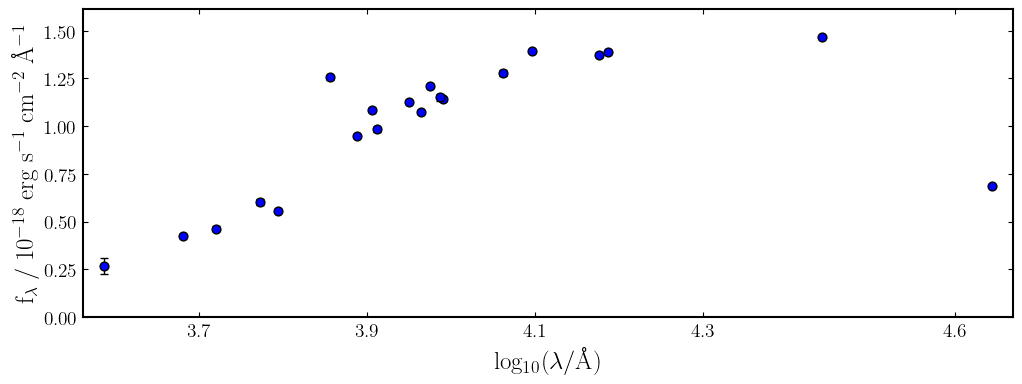

In [10]:
galaxy = pipes.galaxy("v1", load_photometry_data, spectrum_exists=False, filt_list=filter_list)
fig = galaxy.plot()

# setting parameters

In [11]:
exp = {}                                  # Tau-model star-formation history component
exp["age"] = (0.1, 15.)                   # Vary age between 100 Myr and 15 Gyr. In practice 
                                          # the code automatically limits this to the age of
                                          # the Universe at the observed redshift.

exp["tau"] = (0.3, 10.)                   # Vary tau between 300 Myr and 10 Gyr
exp["massformed"] = (1., 15.)             # vary log_10(M*/M_solar) between 1 and 15
exp["metallicity"] = (0., 2.5)            # vary Z between 0 and 2.5 Z_oldsolar

dust = {}                                 # Dust component
dust["type"] = "Calzetti"                 # Define the shape of the attenuation curve
dust["Av"] = (0., 2.)                     # Vary Av between 0 and 2 magnitudes

fit_instructions = {}                     # The fit instructions dictionary
fit_instructions["redshift"] = (0.9, 1)  # Vary observed redshift from 0.9 to 1 #spetrum redshift=0.924
fit_instructions["exponential"] = exp   
fit_instructions["dust"] = dust

# fitting proccess

In [12]:
fit = pipes.fit(galaxy, fit_instructions)
fit.fit(verbose=False)


Results loaded from pipes/posterior/./v1.h5

Fitting not performed as results have already been loaded from pipes/posterior/./v1.h5. To start over delete this file or change run.



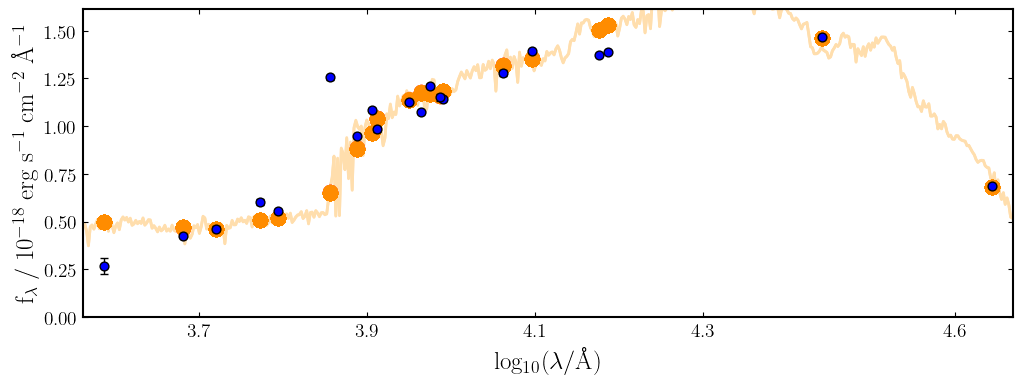

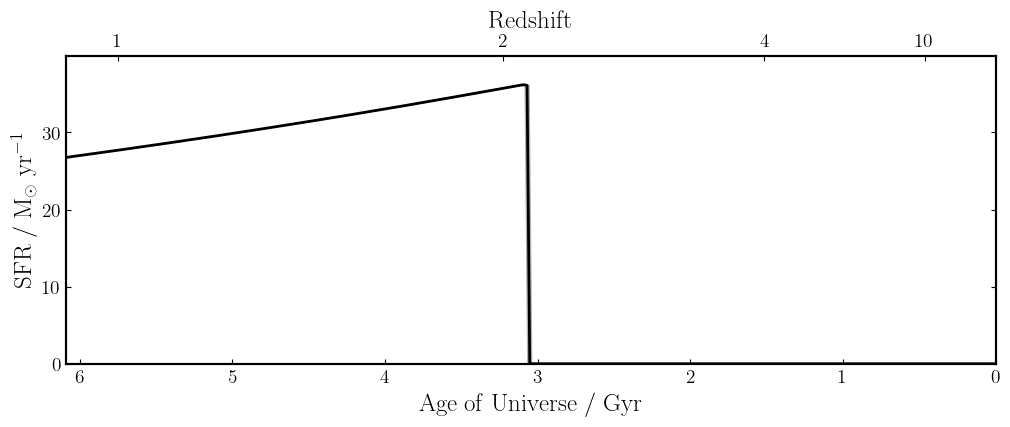

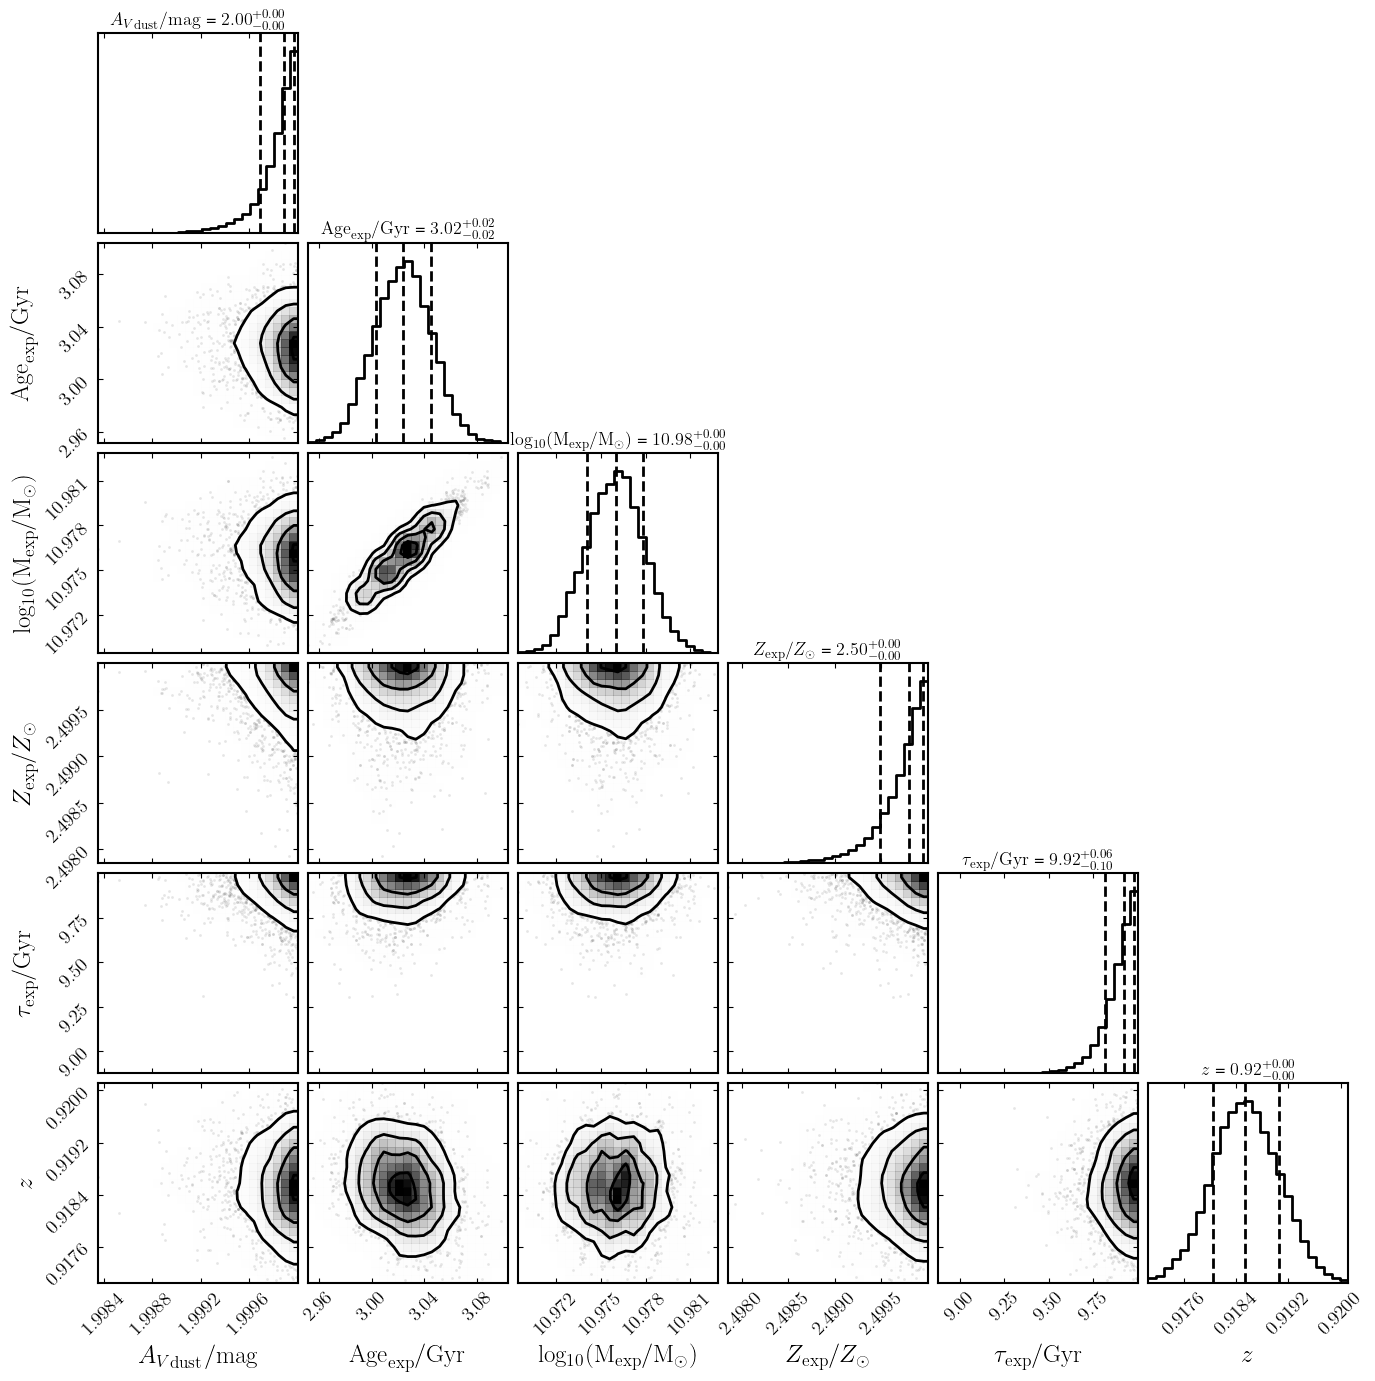

In [13]:
fig = fit.plot_spectrum_posterior(save=False, show=True)
fig = fit.plot_sfh_posterior(save=False, show=True)
fig = fit.plot_corner(save=False, show=True)

In [14]:
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from astropy.table import Table

class MultiBandPhotometry:
    def __init__(self, image_files, filter_files, source_position):
        self.image_files = image_files
        self.filter_files = filter_files
        self.source_position = source_position
        self.results = []

    def load_image(self, file):
        # Implement code to load FITS image here
        pass

    def load_filter(self, file):
        # Implement code to load filter response curve here
        pass

    def measure_flux(self, image, filter_curve, method='simple'):
        # Implement flux measurement method (e.g., aperture photometry or PSF fitting)
        pass

    def estimate_background(self, image, method='median'):
        # Implement background estimation method (e.g., median or annulus)
        pass

    def plot_image(self, image, title):
        # Implement code to plot the image
        pass

    def plot_filter_curve(self, filter_curve, title):
        # Implement code to plot the filter response curve
        pass

    def run_photometry(self):
        for i, image_file in enumerate(self.image_files):
            image = self.load_image(image_file)
            filter_curve = self.load_filter(self.filter_files[i])

            self.plot_image(image, f"Image {i + 1}")
            self.plot_filter_curve(filter_curve, f"Filter {i + 1}")

            flux = self.measure_flux(image, filter_curve)
            background = self.estimate_background(image)

            # Store results in a list
            self.results.append({
                'Band': f'Band {i + 1}',
                'Flux': flux,
                'Background': background
            })

    def save_results(self, output_file):
        # Save the results as a table
        result_table = Table(self.results)
        result_table.write(output_file, format='fits')

if __name__ == "__main__":
    # Example usage:
    image_files = ["image1.fits", "image2.fits"]
    filter_files = ["filter1.dat", "filter2.dat"]
    source_position = (x, y)  # Replace with the actual source coordinates

    photometry = MultiBandPhotometry(image_files, filter_files, source_position)
    photometry.run_photometry()
    photometry.save_results("output.fits")


NameError: name 'x' is not defined